# **1. Chargement et téléchargement des libraries**

Installation du package TCGAbiolinks : à faire une fois

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install(c(
  "TCGAbiolinks",
  "SummarizedExperiment"
))

install.packages(c("dplyr", "ggplot2", "pheatmap"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.27), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'TCGAbiolinks' 'SummarizedExperiment'”
Old packages: 'BH', 'circlize', 'data.table', 'futile.logger', 'future.apply',
  'httr2', 'isoband', 'knitr', 'leidenbase', 'parallelly', 'RcppArmadillo',
  'reformulas', 'Seurat', 'SeuratObject', 'shiny', 'tidyr', 'TMB', 'xfun',
  'yaml', 'yulab.utils', 'zoo'




The downloaded binary packages are in
	/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T//RtmpPbZriI/downloaded_packages


chargement des libraries

In [3]:
library(TCGAbiolinks)
library(SummarizedExperiment)
library(dplyr)
library(ggplot2)
library(pheatmap)

set.seed(555)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

# **2. Chargement du dataset TCGA thyroide**

### _**téléchargement des données TCGA**_
- projet THCA : cancer de la thyroide 
- seulement les données de quantification d'expression génique et de transcriptome profiling 

In [5]:
# prends .. minutes
query <- GDCquery(
  project = "TCGA-THCA",
  data.category = "Transcriptome Profiling",
  data.type = "Gene Expression Quantification",
  workflow.type = "STAR - Counts"
)

GDCdownload(query, directory = "../data")
se <- GDCprepare(query,directory = "../data")

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-THCA

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



|====================================================|100%                      Completed after 27 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

thca subtype information from:doi:10.1016/j.cell.2014.09.050

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [6]:
se

class: RangedSummarizedExperiment 
dim: 60660 572 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(572): TCGA-DJ-A2Q6-01A-11R-A18C-07
  TCGA-FK-A3SE-01A-11R-A22L-07 ... TCGA-DJ-A2PX-01A-11R-A18C-07
  TCGA-EL-A3ZS-01A-12R-A23N-07
colData names(241): barcode patient ... paper_TERT_AC paper_TERT_Q

### _**load des données cliniques**_

In [7]:
clinique <- GDCquery_clinic(
  project = "TCGA-THCA",
  type = "clinical")

head(clinique)
names(clinique)

#lister tous les éléments de ajcc_pathologic_stage
table(clinique$ajcc_pathologic_stage)

,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,laterality,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,age_at_diagnosis,⋯,treatments_radiation_treatment_anatomic_sites,treatments_radiation_treatment_outcome,treatments_radiation_treatment_dose_units,treatments_radiation_number_of_fractions,treatments_radiation_radiosensitizing_agent,treatments_radiation_course_number,treatments_radiation_clinical_trial_indicator,treatments_radiation_route_of_administration,treatments_radiation_initial_disease_status,bcr_patient_barcode
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCGA-THCA,TCGA-EM-A2OZ,No,Stage I,0,Midline,NA,NA,Thyroid gland,24195,⋯,NULL,NA,NA,NA,NA,NA,NA,NULL,NA,TCGA-EM-A2OZ
2,TCGA-THCA,TCGA-EM-A22J,No,Stage II,0,Left,NA,NA,Thyroid gland,20539,⋯,NULL;Primary Tumor Field,NA;Complete Response,NA;mCi,NA,NA,NA,NA,NULL,NA,TCGA-EM-A22J
3,TCGA-THCA,TCGA-DJ-A2PR,No,Stage I,0,Bilateral,NA,NA,Thyroid gland,9914,⋯,NULL,NA,NA,NA,NA,NA,NA,NULL,NA,TCGA-DJ-A2PR
4,TCGA-THCA,TCGA-ET-A40S,No,Stage II,0,Left,NA,NA,Thyroid gland,22733,⋯,NULL,Not Reported;NA,NA,NA,NA,NA,NA,NULL,NA,TCGA-ET-A40S
5,TCGA-THCA,TCGA-ET-A39M,No,Stage I,0,Left,NA,NA,Thyroid gland,12441,⋯,NULL;Primary Tumor Field,NA;Complete Response,NA,NA;1,NA,NA,NA,NULL,NA,TCGA-ET-A39M
6,TCGA-THCA,TCGA-ET-A40Q,No,Stage I,0,Right,NA,NA,Thyroid gland,14136,⋯,NULL;Primary Tumor Field,NA;Unknown,NA;mCi,NA;1,NA,NA,NA,NULL,NA,TCGA-ET-A40Q


[1] "project"                                           
 [2] "submitter_id"                                      
 [3] "synchronous_malignancy"                            
 [4] "ajcc_pathologic_stage"                             
 [5] "days_to_diagnosis"                                 
 [6] "laterality"                                        
 [7] "created_datetime"                                  
 [8] "last_known_disease_status"                         
 [9] "tissue_or_organ_of_origin"                         
[10] "age_at_diagnosis"                                  
[11] "primary_diagnosis"                                 
[12] "updated_datetime"                                  
[13] "prior_malignancy"                                  
[14] "year_of_diagnosis"                                 
[15] "state"                                             
[16] "prior_treatment"                                   
[17] "diagnosis_is_primary_disease"                      
[18] "days_to_last_known_disease_status"                 
[19] "ajcc_staging_system_edition"                       
[20] "ajcc_pathologic_t"                                 
[21] "days_to_recurrence"                                
[22] "morphology"                                        
[23] "ajcc_pathologic_n"                                 
[24] "ajcc_pathologic_m"                                 
[25] "residual_disease"                                  
[26] "classification_of_tumor"                           
[27] "tumor_focality"                                    
[28] "diagnosis_id"                                      
[29] "icd_10_code"                                       
[30] "site_of_resection_or_biopsy"                       
[31] "tumor_grade"                                       
[32] "progression_or_recurrence"                         
[33] "tumor_of_origin"                                   
[34] "cigarettes_per_day"                                
[35] "alcohol_history"                                   
[36] "exposure_id"                                       
[37] "exposure_type"                                     
[38] "alcohol_intensity"                                 
[39] "race"                                              
[40] "gender"                                            
[41] "ethnicity"                                         
[42] "vital_status"                                      
[43] "age_at_index"                                      
[44] "days_to_birth"                                     
[45] "year_of_birth"                                     
[46] "demographic_id"                                    
[47] "age_is_obfuscated"                                 
[48] "year_of_death"                                     
[49] "country_of_residence_at_enrollment"                
[50] "days_to_death"                                     
[51] "days_to_last_follow_up"                            
[52] "follow_ups_disease_response"                       
[53] "treatments_pharmaceutical_treatment_intent_type"   
[54] "treatments_pharmaceutical_treatment_id"            
[55] "treatments_pharmaceutical_treatment_type"          
[56] "treatments_pharmaceutical_treatment_or_therapy"    
[57] "treatments_pharmaceutical_therapeutic_agents"      
[58] "treatments_pharmaceutical_timepoint_category"      
[59] "treatments_pharmaceutical_prescribed_dose_units"   
[60] "treatments_pharmaceutical_pretreatment"            
[61] "treatments_pharmaceutical_prescribed_dose"         
[62] "treatments_pharmaceutical_days_to_treatment_end"   
[63] "treatments_pharmaceutical_treatment_dose"          
[64] "treatments_pharmaceutical_days_to_treatment_start" 
[65] "treatments_pharmaceutical_treatment_anatomic_sites"
[66] "treatments_pharmaceutical_treatment_outcome"       
[67] "treatments_pharmaceutical_treatment_dose_units"    
[68] "treatments_pharmaceutical_number_of_fractions"     
[69] "treatments_pharmaceutical_radiosensitizing_agent"  


  Stage I  Stage II Stage III  Stage IV Stage IVA Stage IVC 
      285        52       113         2        47         6 

# **3. Exploration du dataset**

In [51]:
# Dimensions
se
dim(se)

class: RangedSummarizedExperiment 
dim: 60660 572 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(572): TCGA-DJ-A2Q6-01A-11R-A18C-07
  TCGA-FK-A3SE-01A-11R-A22L-07 ... TCGA-DJ-A2PX-01A-11R-A18C-07
  TCGA-EL-A3ZS-01A-12R-A23N-07
colData names(241): barcode patient ... paper_TERT_AC paper_TERT_Q

[1] 60660   572

In [52]:
# Métadonnées
meta <- as.data.frame(colData(se))
head(meta)

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,tumor_descriptor,sample_id,pathology_report_uuid,submitter_id,⋯,paper_mutDriver_DCCF_CI95H,paper_mutDriver_CCF_gene,paper_EXCLUDE_SAMPLE,paper_patient,paper_TERT_DEPTH,paper_TERT_POWER,paper_TERT,paper_TERT_AF,paper_TERT_AC,paper_TERT_Q
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>
TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6,TCGA-DJ-A2Q6-01A,TP,Primary solid Tumor,TCGA-DJ-A2Q6-01A,Primary,74b9c0c8-ef36-4194-ab8c-d81d61a39705,CCF825BD-7410-4ED2-B0E2-8B17BB5C5BBD,TCGA-DJ-A2Q6,⋯,"1,000",BRAF:1.000,0,TCGA-DJ-A2Q6,81005,1,,,NA,
TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE,TCGA-FK-A3SE-01A,TP,Primary solid Tumor,TCGA-FK-A3SE-01A,Primary,d3cc158d-413d-49e6-8d23-3ed89fdea94a,3489196F-F9FD-4797-B4F2-0D66D420102A,TCGA-FK-A3SE,⋯,,,0,TCGA-FK-A3SE,44535,1,,,NA,
TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA,TCGA-DJ-A2QA-01A,TP,Primary solid Tumor,TCGA-DJ-A2QA-01A,Primary,2277f3f2-411e-47ab-a2b9-f80fd33540a1,E3CC8058-B202-4433-8597-6BD196D04AAC,TCGA-DJ-A2QA,⋯,"1,000",BRAF:1.000,0,TCGA-DJ-A2QA,75617,1,,,NA,
TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-FY-A2QD,TCGA-FY-A2QD-01A,TP,Primary solid Tumor,TCGA-FY-A2QD-01A,Primary,08d3cb3b-9a80-4034-b06d-b37dd38c8b9b,D4447081-2054-46B6-B83F-C0D2DF8C4AA1,TCGA-FY-A2QD,⋯,,,0,TCGA-FY-A2QD,23085,1,,,NA,
TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR,TCGA-EL-A3GR-01A,TP,Primary solid Tumor,TCGA-EL-A3GR-01A,Primary,12693f53-fa09-494c-82eb-bf735ea84e98,F2945CC2-AEE4-45F7-A640-4174EB0D37FD,TCGA-EL-A3GR,⋯,"1,000",BRAF:0.910,0,TCGA-EL-A3GR,37268,1,,,NA,
TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7,TCGA-EL-A3T7-01A,TP,Primary solid Tumor,TCGA-EL-A3T7-01A,Primary,76e3d9f4-513f-4a44-8918-4c29ce5fb305,6B1080F8-AF82-4FE3-B91D-3CA2DBA4A37E,TCGA-EL-A3T7,⋯,"0,982",BRAF:0.850,0,TCGA-EL-A3T7,46146,1,,,NA,


In [53]:
# Types d’échantillons
table(meta$sample_type)
table(meta$shortLetterCode)


         Metastatic       Primary Tumor Solid Tissue Normal 
                  8                 505                  59 


 NT  TM  TP 
 59   8 505 

# **4. Création de la matrice d'expression**

## *Loading de la matrice d'expresison brute*

In [54]:
expr <- assay(se, "unstranded")   # counts
head(expr)
dim(expr)

,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7-11A-21R-A22L-07,TCGA-FE-A230-01A-11R-A14Y-07,TCGA-EM-A3FO-01A-11R-A21D-07,TCGA-DJ-A3VB-01A-11R-A23N-07,⋯,TCGA-EM-A2P1-01A-11R-A206-07,TCGA-EL-A3T1-01A-11R-A22L-07,TCGA-EL-A3T1-11A-11R-A22L-07,TCGA-DJ-A2PS-01A-11R-A18C-07,TCGA-EL-A3TB-11A-11R-A22L-07,TCGA-EL-A3TB-01A-11R-A22L-07,TCGA-BJ-A45C-01A-11R-A23W-07,TCGA-DJ-A3UX-01A-11R-A22L-07,TCGA-DJ-A2PX-01A-11R-A18C-07,TCGA-EL-A3ZS-01A-12R-A23N-07
ENSG00000000003.15,6156,7191,2219,5185,4466,9702,4546,2449,6336,5997,⋯,2691,4533,2931,4471,5029,4742,3753,4488,6131,4097
ENSG00000000005.6,7,3,1,0,3,0,10,0,0,2,⋯,0,0,5,0,4,3,4,5,6,4
ENSG00000000419.13,2540,3815,735,2594,1496,2506,1854,811,1892,3074,⋯,2227,2406,2209,1832,2753,2172,1491,2061,2439,2218
ENSG00000000457.14,1452,767,305,970,820,1036,1279,619,725,856,⋯,759,1120,607,922,1200,1171,962,1151,1213,829
ENSG00000000460.17,297,276,28,135,208,315,183,194,149,317,⋯,279,381,169,226,232,245,166,250,242,313
ENSG00000000938.13,1075,1069,303,71,610,1576,459,446,315,1829,⋯,1147,1127,1169,440,440,372,184,775,1076,1841


[1] 60660   572

_commentaire_ : la matrice d'expression de base a 572 échantillons : 
- **8** "Metastatic"
- **59** "Solid Tissue Normal"
- **505** "Primary Tumor"

Mais les __*Solid Tissue Normal*__ ne sont pas des contrôles sains, juste des échantillons de tissus normaux prélevés à côté de la tumeur, ils n'ont pas de stade tumoral. Il faut qu'on les enlève pour ne garder que les échantillons "Primary Tumor".

Pour les __*Metastasique*__, ce ne sont pas des tissus thyroidiens, et ont un profil d'expression reprogrammé et souvent issus de stades avancés. Du coup le modèle va apprendre seulement le site métastasique plutôt que la biologie du stade tumoral. En fait, on fait ici du data leakage parce que les métastases impliquent forcément un stade avancé.

Alors, on ne garde que les __*Primary Tumor*__ pour faire l'analyse et pouvoir prédire les stades tumoraux. C'est ce que fait la cellule de code suivante. On utilise *se_tumor* au lieu de simplement *se*, et *meta_tumor* au lieu de *meta*


In [55]:
se_tumor <- se[, meta$sample_type == "Primary Tumor"] # ne garde que les tumeurs primaires
dim(se_tumor)

meta_tumor <- as.data.frame(colData(se_tumor)) # métadonnées des échantillons tumoraux
meta_tumor$patient_id <- substr(rownames(meta_tumor), 1, 12) # extraction des IDs patients

summary(table(meta_tumor$patient_id)) # permet de vérifier qu'il n'y a qu'un échantillon par patient, évite les doublons
# on peut maintenant dire que 1 colonne = 1 patient = 1 échantillon ssi "Number of factors = 1"

[1] 60660   505

Number of cases in table: 505 
Number of factors: 1 

## *Travailler sur un dataframe réduit, avec seulement les tumeurs primaires*

In [56]:
stopifnot(all(table(meta_tumor$patient_id) == 1)) # si il y a des doublons, le script s'arrête
stopifnot(all(meta_tumor$barcode %in% colnames(expr))) # vérifie que tous les échantillons tumoraux sont dans la matrice d'expression

se_patient <- se_tumor # simplifie les noms (pour pas s'y perdre)
metadata_patients <- meta_tumor

- se_patient : matrice d'expression avec seulement les échantillons "Primary Tumor"
- metadata_patient : metadata avec seulement les échantillons "Primary Tumor"

In [57]:
head(assay(se_patient))
dim(assay(se_patient))
head(metadata_patients, 3) # les 3 premiers

,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-FE-A230-01A-11R-A14Y-07,TCGA-EM-A3FO-01A-11R-A21D-07,TCGA-DJ-A3VB-01A-11R-A23N-07,TCGA-BJ-A28X-01A-11R-A22L-07,⋯,TCGA-DJ-A13S-01A-11R-A10U-07,TCGA-EM-A3SY-01A-11R-A22U-07,TCGA-EM-A2P1-01A-11R-A206-07,TCGA-EL-A3T1-01A-11R-A22L-07,TCGA-DJ-A2PS-01A-11R-A18C-07,TCGA-EL-A3TB-01A-11R-A22L-07,TCGA-BJ-A45C-01A-11R-A23W-07,TCGA-DJ-A3UX-01A-11R-A22L-07,TCGA-DJ-A2PX-01A-11R-A18C-07,TCGA-EL-A3ZS-01A-12R-A23N-07
ENSG00000000003.15,6156,7191,2219,5185,4466,9702,2449,6336,5997,3534,⋯,2448,3693,2691,4533,4471,4742,3753,4488,6131,4097
ENSG00000000005.6,7,3,1,0,3,0,0,0,2,1,⋯,0,0,0,0,0,3,4,5,6,4
ENSG00000000419.13,2540,3815,735,2594,1496,2506,811,1892,3074,1769,⋯,1851,2286,2227,2406,1832,2172,1491,2061,2439,2218
ENSG00000000457.14,1452,767,305,970,820,1036,619,725,856,948,⋯,764,459,759,1120,922,1171,962,1151,1213,829
ENSG00000000460.17,297,276,28,135,208,315,194,149,317,332,⋯,176,185,279,381,226,245,166,250,242,313
ENSG00000000938.13,1075,1069,303,71,610,1576,446,315,1829,1886,⋯,635,332,1147,1127,440,372,184,775,1076,1841


[1] 60660   505

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,tumor_descriptor,sample_id,pathology_report_uuid,submitter_id,⋯,paper_mutDriver_CCF_gene,paper_EXCLUDE_SAMPLE,paper_patient,paper_TERT_DEPTH,paper_TERT_POWER,paper_TERT,paper_TERT_AF,paper_TERT_AC,paper_TERT_Q,patient_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<chr>
TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6,TCGA-DJ-A2Q6-01A,TP,Primary solid Tumor,TCGA-DJ-A2Q6-01A,Primary,74b9c0c8-ef36-4194-ab8c-d81d61a39705,CCF825BD-7410-4ED2-B0E2-8B17BB5C5BBD,TCGA-DJ-A2Q6,⋯,BRAF:1.000,0,TCGA-DJ-A2Q6,81005,1,,,NA,,TCGA-DJ-A2Q6
TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE,TCGA-FK-A3SE-01A,TP,Primary solid Tumor,TCGA-FK-A3SE-01A,Primary,d3cc158d-413d-49e6-8d23-3ed89fdea94a,3489196F-F9FD-4797-B4F2-0D66D420102A,TCGA-FK-A3SE,⋯,,0,TCGA-FK-A3SE,44535,1,,,NA,,TCGA-FK-A3SE
TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA,TCGA-DJ-A2QA-01A,TP,Primary solid Tumor,TCGA-DJ-A2QA-01A,Primary,2277f3f2-411e-47ab-a2b9-f80fd33540a1,E3CC8058-B202-4433-8597-6BD196D04AAC,TCGA-DJ-A2QA,⋯,BRAF:1.000,0,TCGA-DJ-A2QA,75617,1,,,NA,,TCGA-DJ-A2QA


## *Renommer les patients avec leurs métadata*

### _**Filtrer : age, sexe, stage, type de tumeur, et mutation simple**_

In [67]:
metadata_patients <- metadata_patients %>%
  mutate(
    # Age
    age_years = as.numeric(age_at_diagnosis) / 365.25,
    age_yr_round = as.integer(round(age_years)),

    # Sexe
    sex_short = case_when(
      tolower(gender) %in% c("male","m")   ~ "male",
      tolower(gender) %in% c("female","f") ~ "female",
      # TRUE ~ "UNKSEX"
      TRUE ~ NA_character_
    ),

    # Stage simplifié
    stage = as.character(ajcc_pathologic_stage),
    stage_simple = case_when(
      grepl("^Stage I\\b", stage)   ~ "Stade_I",
      grepl("^Stage II\\b", stage)  ~ "Stade_II",
      grepl("^Stage III\\b", stage) ~ "Stade_III",
      grepl("^Stage IV", stage)  ~ "Stade_IV",
      TRUE ~ NA_character_
    ),

    # Type cancer : PTC / FTC / OTHER
    diagnosis = as.character(primary_diagnosis),
    cancer_type = case_when(
      grepl("papillar",  tolower(diagnosis)) ~ "PTC",
      grepl("follicular",tolower(diagnosis)) ~ "FTC",
      TRUE ~ "OTHER"
    )
  )

### 3) Mutation + catégories

get_mutation_label <- function(df) {
  if ("paper_mutDriver_CCF_gene" %in% names(df)) {
    x <- as.character(df$paper_mutDriver_CCF_gene)   # ex "BRAF:1.000"
    mut <- sub(":.*$", "", x)
    mut <- ifelse(is.na(mut) | mut == "", "UNK", mut)
    return(mut)
  }
  rep("UNK", nrow(df))
}

metadata_patients$mutation <- get_mutation_label(metadata_patients)

metadata_patients <- metadata_patients %>%
  mutate(
    mutation_group = case_when(
      mutation == "BRAF" ~ "BRAF",
      mutation %in% c("NRAS","HRAS","KRAS") ~ "RAS",
      mutation == "EIF1AX" ~ "EIF1AX",
      mutation == "UNK" ~ "NO_CANONICAL_DRIVER",
      TRUE ~ "OTHER"
    )
  )

### _**Visualisation des metadatas des patients**_

In [68]:
# Visualisation de ce qui a été fait avant
head(metadata_patients)
# Nombre de stage, type de cancer, mutation et age
table(metadata_patients$stage_simple)
table(metadata_patients$cancer_type)
table(metadata_patients$mutation_group)
table(metadata_patients$age_yr_round)

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,tumor_descriptor,sample_id,pathology_report_uuid,submitter_id,⋯,patient_id,age_years,age_yr_round,sex_short,stage,stage_simple,diagnosis,cancer_type,mutation,mutation_group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6,TCGA-DJ-A2Q6-01A,TP,Primary solid Tumor,TCGA-DJ-A2Q6-01A,Primary,74b9c0c8-ef36-4194-ab8c-d81d61a39705,CCF825BD-7410-4ED2-B0E2-8B17BB5C5BBD,TCGA-DJ-A2Q6,⋯,TCGA-DJ-A2Q6,38.85832,39,female,Stage I,Stade_I,"Papillary adenocarcinoma, NOS",PTC,BRAF,BRAF
TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE,TCGA-FK-A3SE-01A,TP,Primary solid Tumor,TCGA-FK-A3SE-01A,Primary,d3cc158d-413d-49e6-8d23-3ed89fdea94a,3489196F-F9FD-4797-B4F2-0D66D420102A,TCGA-FK-A3SE,⋯,TCGA-FK-A3SE,31.40862,31,female,Stage I,Stade_I,"Papillary adenocarcinoma, NOS",PTC,UNK,NO_CANONICAL_DRIVER
TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA,TCGA-DJ-A2QA-01A,TP,Primary solid Tumor,TCGA-DJ-A2QA-01A,Primary,2277f3f2-411e-47ab-a2b9-f80fd33540a1,E3CC8058-B202-4433-8597-6BD196D04AAC,TCGA-DJ-A2QA,⋯,TCGA-DJ-A2QA,56.90349,57,female,Stage III,Stade_III,"Papillary carcinoma, follicular variant",PTC,BRAF,BRAF
TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR,TCGA-EL-A3GR-01A,TP,Primary solid Tumor,TCGA-EL-A3GR-01A,Primary,12693f53-fa09-494c-82eb-bf735ea84e98,F2945CC2-AEE4-45F7-A640-4174EB0D37FD,TCGA-EL-A3GR,⋯,TCGA-EL-A3GR,31.75359,32,female,Stage I,Stade_I,"Papillary adenocarcinoma, NOS",PTC,BRAF,BRAF
TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7,TCGA-EL-A3T7-01A,TP,Primary solid Tumor,TCGA-EL-A3T7-01A,Primary,76e3d9f4-513f-4a44-8918-4c29ce5fb305,6B1080F8-AF82-4FE3-B91D-3CA2DBA4A37E,TCGA-EL-A3T7,⋯,TCGA-EL-A3T7,47.37029,47,female,Stage II,Stade_II,"Papillary adenocarcinoma, NOS",PTC,BRAF,BRAF
TCGA-EM-A3FO-01A-11R-A21D-07,TCGA-EM-A3FO-01A-11R-A21D-07,TCGA-EM-A3FO,TCGA-EM-A3FO-01A,TP,Primary solid Tumor,TCGA-EM-A3FO-01A,Primary,cb5bda84-01a5-498e-8df7-deb78d9d9b35,9AD500BD-2288-4319-A686-7AB6FF840D8D,TCGA-EM-A3FO,⋯,TCGA-EM-A3FO,40.69541,41,male,Stage I,Stade_I,"Papillary adenocarcinoma, NOS",PTC,BRAF,BRAF



  Stade_I  Stade_II Stade_III  Stade_IV 
      264        48        99        49 


  FTC OTHER   PTC 
    1     8   451 


               BRAF              EIF1AX NO_CANONICAL_DRIVER                 RAS 
                201                   5                 206                  48 


13 15 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
 1  2  2  1  4  3  4  4  5  5  5  2  6  8  8  5  9  8 13 10 14  9 14 12 12  8 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 
10 11 10  3 10 14 11  8  7  9 12 19  4  9 10 13 10  7  5  2  6  7 10  6  6  7 
67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 83 84 85 87 88 89 
 3  6  3  9  4  4  3  1  3  3  3  3  3  2  2  2  2  1  1  1  1 

On a 45 patients qui n'ont pas de stade tumoral

In [ ]:
# fonction pour faire des barplots complets
plot_bar_counts <- function(df, var, title, xlab) {
  df %>%
    filter(!is.na(.data[[var]])) %>%
    count(.data[[var]]) %>%
    ggplot(aes(x = .data[[var]], y = n)) +
    geom_col(fill = "#4C72B0") +
    geom_text(aes(label = n), vjust = -0.4, size = 4) +
    labs(
      title = title,
      x = xlab,
      y = "Nombre de patients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(face = "bold", hjust = 0.5),
      axis.text.x = element_text(angle = 20, hjust = 1)
    )
}

Warning message:
“Removed 12 rows containing non-finite outside the scale range (`stat_bin()`).”


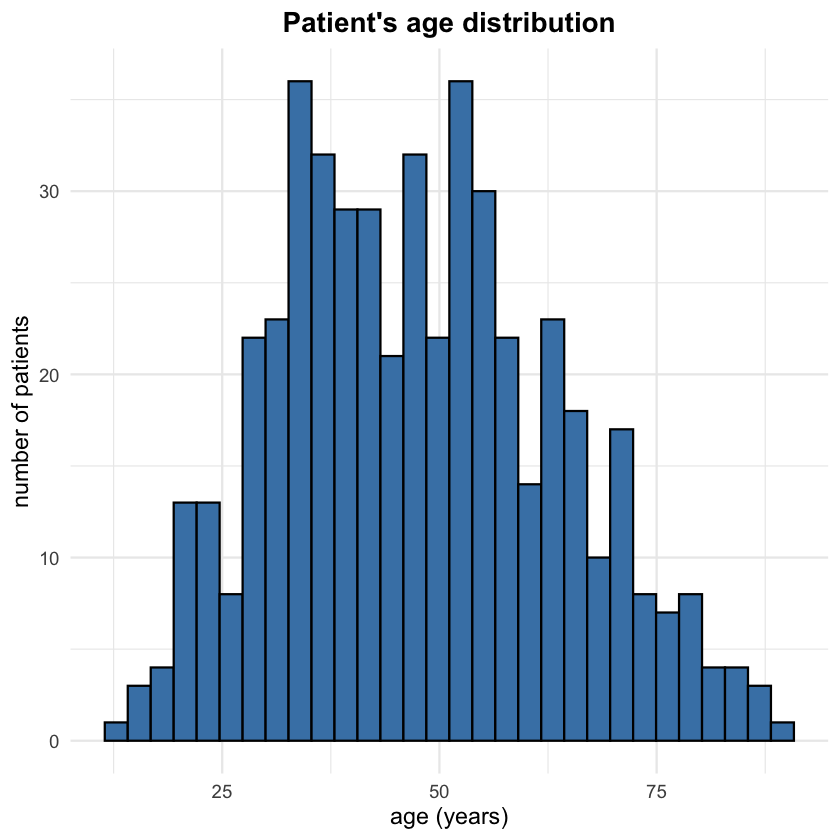

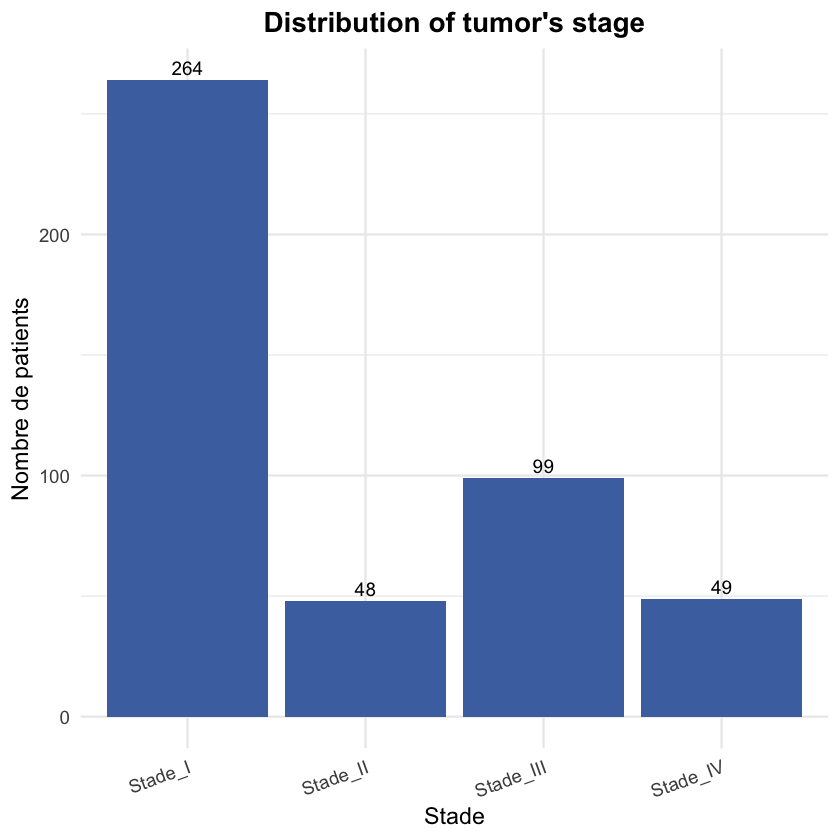

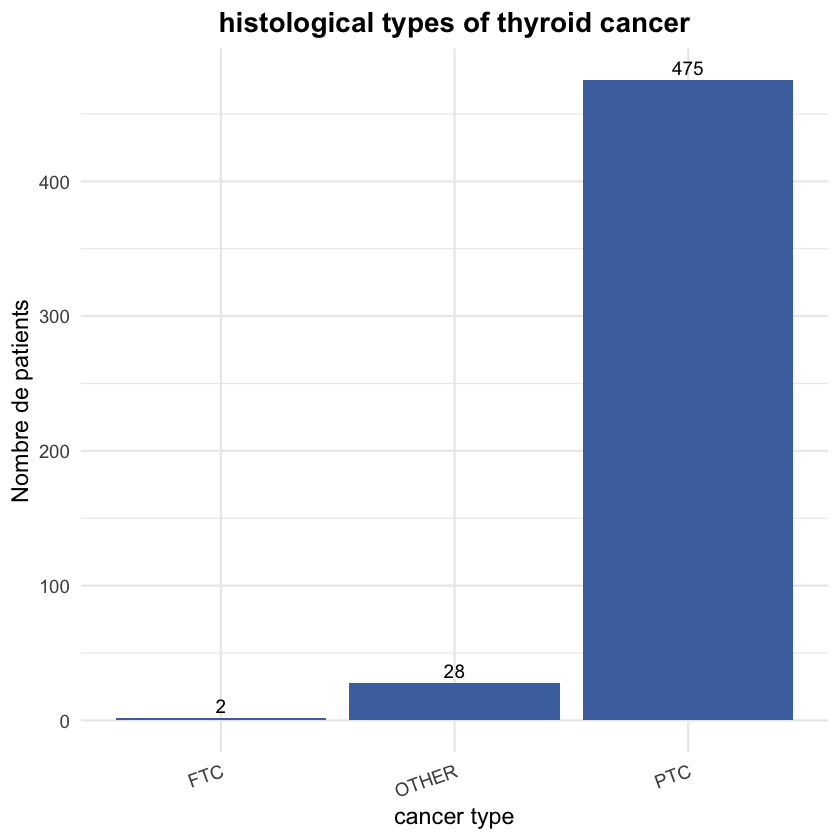

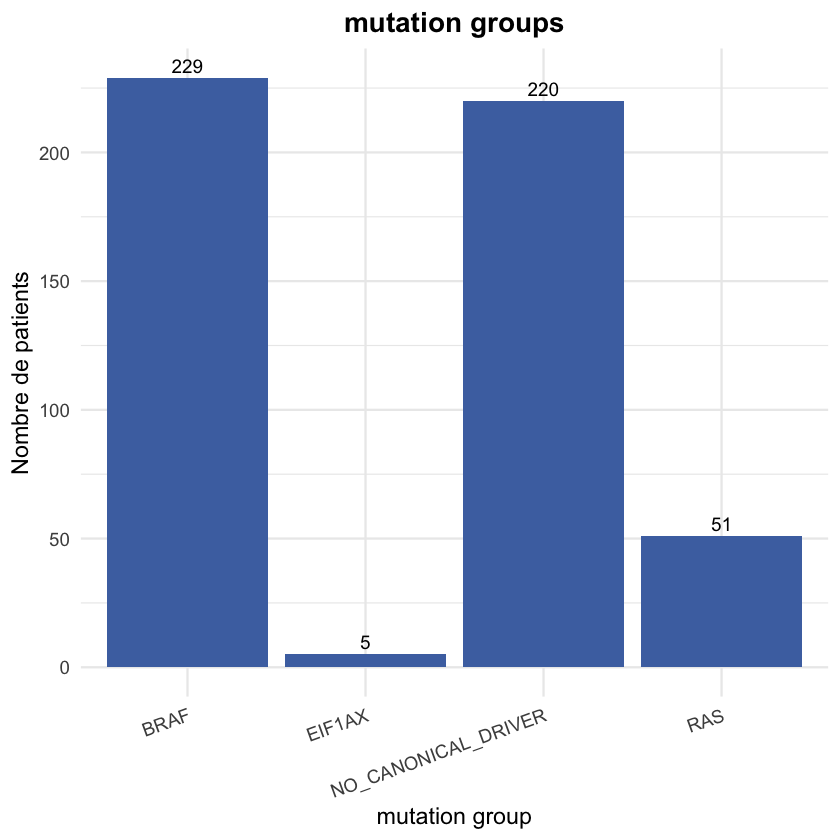

In [30]:
# plot pour les ages
ggplot(metadata_patients, aes(x = age_years)) +
  geom_histogram(bins = 30, color = "black", fill = "steelblue") + labs(title = "Patient's age distribution", x = "age (years)", y = "number of patients") + theme_minimal(base_size = 14) + theme(plot.title = element_text(face = "bold", hjust = 0.5))

# plot pour les stades tumoraux
plot_bar_counts(metadata_patients, var   = "stage_simple", title = "Distribution of tumor's stage", xlab  = "Stade")

# plot pour les types tumoraux
plot_bar_counts(metadata_patients, var   = "cancer_type", title = "histological types of thyroid cancer", xlab  = "cancer type")

# plot pour les groupes de mutations
plot_bar_counts(metadata_patients, var   = "mutation_group", title = "mutation groups", xlab  = "mutation group")

Warning message:
“Removed 12 rows containing non-finite outside the scale range
(`stat_boxplot()`).”



	Kruskal-Wallis rank sum test

data:  age_years by stage_simple
Kruskal-Wallis chi-squared = 208.95, df = 3, p-value < 2.2e-16


,Stade_I,Stade_II,Stade_III
Stade_II,3.914016e-16,NA,NA
Stade_III,2.392890e-30,0.7994671,NA
Stade_IV,2.904607e-19,0.4778758,0.3536112


stage_1,stage_2,p_value
<chr>,<chr>,<dbl>
Stade_II,Stade_I,3.914016e-16
Stade_III,Stade_I,2.392890e-30
Stade_III,Stade_II,7.994671e-01
Stade_IV,Stade_I,2.904607e-19
Stade_IV,Stade_II,4.778758e-01
Stade_IV,Stade_III,3.536112e-01


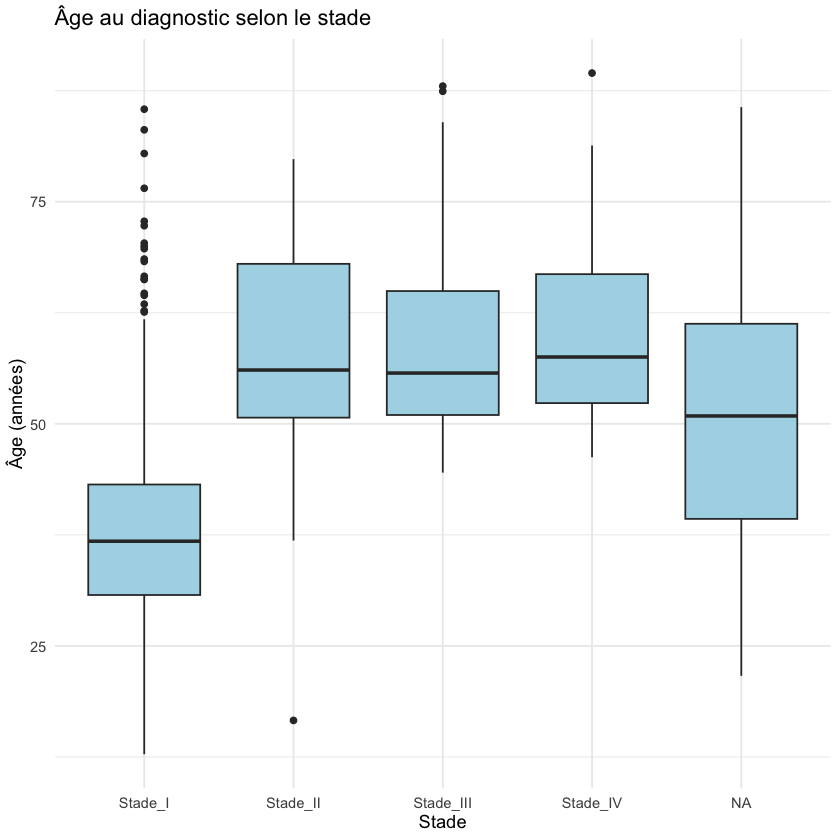

In [ ]:
ggplot(metadata_patients, aes(x = stage_simple, y = age_years)) + geom_boxplot(fill = "lightblue") + labs( title = "Âge au diagnostic selon le stade", x = "Stade", y = "Âge (années)") + theme_minimal()  

# Test de Kruskal-Wallis pour l'âge en fonction du stade
df_age_stage <- metadata_patients %>%
  filter(!is.na(stage_simple)) %>%
  select(stage_simple, age_years)

kruskal.test(age_years ~ stage_simple, data = df_age_stage)

pairwise_results <- pairwise.wilcox.test(
  df_age_stage$age_years,
  df_age_stage$stage_simple,
  p.adjust.method = "BH"   # Benjamini–Hochberg
)
# résultats des tests statistiques
pairwise_results$p.value
pval_table <- as.data.frame(pairwise_results$p.value)
library(tidyr)

pval_long <- pval_table %>%
  mutate(stage_1 = rownames(.)) %>%
  pivot_longer(
    cols = -stage_1,
    names_to = "stage_2",
    values_to = "p_value"
  ) %>%
  filter(!is.na(p_value))

pval_long

### _**Mettre les labels dans le nom des patients**_

In [ ]:
metadata_patients %>%
  select(
    sample_label = paste(
      barcode,                          # ou patient_id si vous préférez
      paste0(age_yr_round, "ANS"),
      sex_short,
      stage_simple,
      mutation_group,
      cancer_type,
      sep = "_"
    ),
    sample_label = make.unique(sample_label)
  )


In [ ]:
sample_label <- paste(
  paste0("ID=", metadata_patients$patient_id),
  paste0("AGE=", metadata_patients$age_yr_round, "ANS"),
  paste0("SEX=", metadata_patients$sex_short),
  paste0("STAGE=", metadata_patients$stage_simple),
  paste0("MUT=", metadata_patients$mutation_group),
  paste0("TYPE=", metadata_patients$cancer_type),
  sep = "_"
)

sample_label <- make.unique(sample_label)
colnames(se_patient) <- sample_label

In [ ]:
head(colnames(se_patient))
length(colnames(se_patient)) # nombre de patients pour lesquels on a des données d'expression

[1] "ID=TCGA-DJ-A2Q6_AGE=39ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC"               
[2] "ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC"
[3] "ID=TCGA-DJ-A2QA_AGE=57ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC"             
[4] "ID=TCGA-EL-A3GR_AGE=32ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC"               
[5] "ID=TCGA-EL-A3T7_AGE=47ANS_SEX=female_STAGE=Stade_II_MUT=BRAF_TYPE=PTC"              
[6] "ID=TCGA-EM-A3FO_AGE=41ANS_SEX=male_STAGE=Stade_I_MUT=BRAF_TYPE=PTC"

[1] 460

## **Matrice d'expresison finale**

In [78]:
expr_final <- assay(se_patient, "unstranded")

In [79]:
head(expr_final[, 1:5])

,ID=TCGA-DJ-A2Q6_AGE=39ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,ID=TCGA-DJ-A2QA_AGE=57ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,ID=TCGA-EL-A3GR_AGE=32ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,ID=TCGA-EL-A3T7_AGE=47ANS_SEX=female_STAGE=Stade_II_MUT=BRAF_TYPE=PTC
ENSG00000000003.15,6156,7191,2219,4466,9702
ENSG00000000005.6,7,3,1,3,0
ENSG00000000419.13,2540,3815,735,1496,2506
ENSG00000000457.14,1452,767,305,820,1036
ENSG00000000460.17,297,276,28,208,315
ENSG00000000938.13,1075,1069,303,610,1576


### _**Filtrer les gènes peu exprimés**_ : je pense que ca nous sert à rien, on est pas en scRNAseq

In [80]:
# # 6) Mapping ENSG -> gene_name (provisoire)
# rd <- as.data.frame(rowData(se_src))

# # très souvent dispo ici:
# gene_name <- rd$havana_gene
# gene_name[is.na(gene_name) | gene_name == ""] <- rownames(expr_final)

# # je conseille de garder ENSG + ajouter gene_name à côté,
# # mais si ton prof veut vraiment les rownames en gene symbols :
# rownames(expr_final) <- make.unique(gene_name)

# # Check final
# dim(expr_final)
# head(colnames(expr_final), 3)
# head(rownames(expr_final), 3)

In [81]:
# head(expr_final)
# dim(expr_final)

### _**Enregistrer la matrice finale en CSV**_

In [82]:
# Enregistrer la matrice finale en CSV

write.csv(
 expr_final,
 file = "../data/THCA_expression_matrix_final.csv",
 row.names = TRUE
)